## Orthogonal polynomials

See Section 9.4. Contains extra material not in text.

How to use families of orthogonal polynomials to write interpolating functions and compute integrals.

## Inner products of functions

We extend inner products, norms, and orthogonality to sets of functions continuous on intervals $[a,b]$.

The inner product of two functions $f$ and $g$ are

$$<f,g> = \int_a^b f(x)g(x)\ dx.$$

The 2-norm of $f$ is $\|f\|_2 = \sqrt{<f,f>}$.

Functions $f$, $g$ are said to be orthogonal if $<f,g> = 0$.

The textbook introduces the concept of a quasi-matrix which is an array of functions, but we will express the same ideas with less notaton.

## Least squares approximation of functions

Start with a set of functions $p_k(x)$, e.g., monomial polynomials, $p_k(x) = x^{k-1}$, $k=1, 2, \dots$.

If $<p_k(x), p_j(x)>=1$ for all $j\neq k$ then the set is said to be orthonormal.

Write a function $f$ in terms of its projection on this set with weights $<p_1(x), f(x)>$, $<p_2(x), f(x)>$.

Our least-squares approximation to a function $f$ using the orthogonal polynomials $p_k$ is 

$$L(f, p_k) = \sum_{k=1}^n <f, p_k(x)> p_k(x).$$

If the functions are not orthonormal, $<p_k, p_j> = \alpha_{j,k} \neq 1$ then normalize the inner product by these factors $\alpha_{j,k}$.

### Legendre polynomial example

In [116]:
using SpecialPolynomials

In [117]:
pk = basis.(Legendre, 0:5)

6-element Vector{Legendre{Float64, :x}}:
 Legendre(1.0⋅P₀(x))
 Legendre(1.0⋅P₁(x))
 Legendre(1.0⋅P₂(x))
 Legendre(1.0⋅P₃(x))
 Legendre(1.0⋅P₄(x))
 Legendre(1.0⋅P₅(x))

In [30]:
convert.(Polynomial, pk)

6-element Vector{Polynomial{Float64, :x}}:
 Polynomial(1.0)
 Polynomial(1.0*x)
 Polynomial(-0.5 + 1.5*x^2)
 Polynomial(-1.5*x + 2.5*x^3)
 Polynomial(0.375 - 3.75*x^2 + 4.375*x^4)
 Polynomial(1.875*x - 8.75*x^3 + 7.875*x^5)

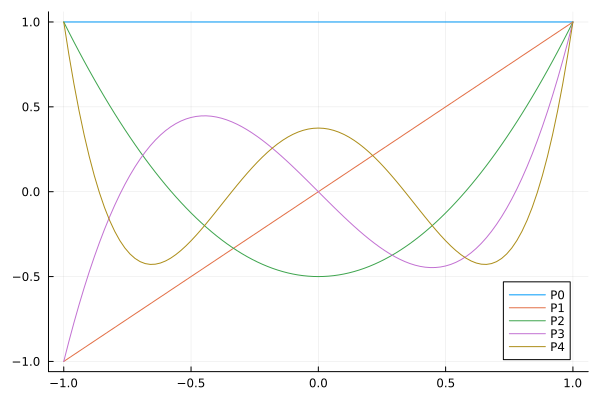

In [118]:
using Plots
plot(pk[1], -1, 1, label = "P0")
plot!(pk[2], -1, 1, label = "P1")
plot!(pk[3], -1, 1, label = "P2")
plot!(pk[4], -1, 1, label = "P3")
plot!(pk[5], -1, 1, label = "P4")

In [119]:
p1 = Legendre([1,2,3])

Legendre(1⋅P₀(x) + 2⋅P₁(x) + 3⋅P₂(x))

In [120]:
convert(Polynomial, p1)

Polynomial(-0.5 + 2.0*x + 4.5*x^2)

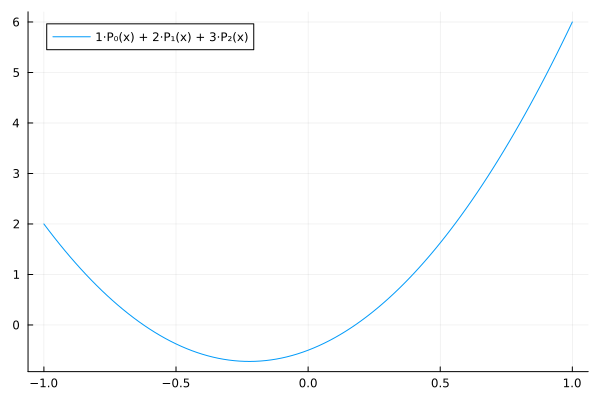

In [121]:
plot(p1, -1, 1)

In [35]:
SpecialPolynomials.innerproduct(Legendre, pk[1], pk[2])

-3.0684121100110004e-17

In [36]:
SpecialPolynomials.innerproduct(Legendre, pk[3], pk[3]) # not orthonormal

0.3999999999999999

In [122]:
function poly_approx(f, basis, kind = Legendre)
   alpha = [ SpecialPolynomials.innerproduct(kind, basis[i], basis[i]) for i in 1:length(basis)] 
   P = sum( SpecialPolynomials.innerproduct(kind, f, basis[i])/alpha[i]*basis[i] for i in 1:length(basis) )
   P
end

poly_approx (generic function with 2 methods)

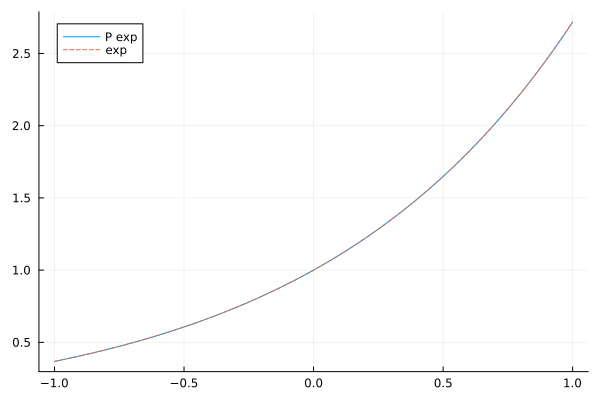

In [123]:
p_exp = poly_approx(exp, pk)
plot(p_exp, -1, 1, label = "P exp")
plot!(exp, -1, 1, label = "exp", line = :dash)

In [125]:
p_exp

Legendre(1.1752011936438014⋅P₀(x) + 1.1036383235143266⋅P₁(x) + 0.3578143506473725⋅P₂(x) + 0.07045563366848834⋅P₃(x) + 0.009965128148868107⋅P₄(x) + 0.0010995861272055712⋅P₅(x))

In [126]:
convert(Polynomial, p_exp)

Polynomial(1.0000309413759407 + 1.0000165970001045*x + 0.4993522954128034*x^2 + 0.16651770555817214*x^3 + 0.04359743565129797*x^4 + 0.008659240751743874*x^5)

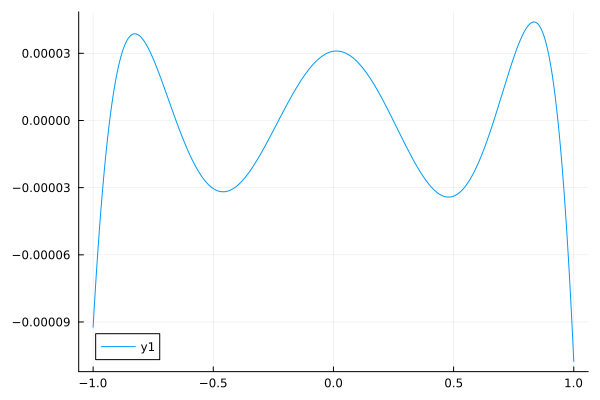

In [124]:
plot(x -> p_exp(x) .- exp(x), -1, 1)

Another example.

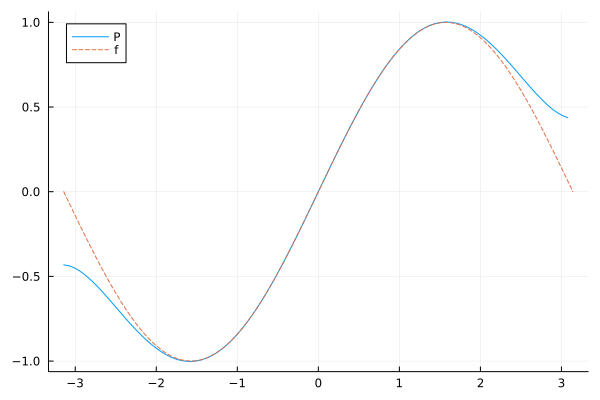

In [127]:
f = sin
p_5 = poly_approx(f, pk)
plot(p_5, -pi, pi, label = "P")
plot!(f, -pi, pi, label = "f", line = :dash)

In [128]:
p_5

Legendre(- 1.1839745854575736e-17⋅P₀(x) + 0.9035060368192703⋅P₁(x) - 9.096798597748591e-17⋅P₂(x) - 0.06304606781978796⋅P₃(x) - 4.06534075468766e-16⋅P₄(x) + 0.0010181727447234514⋅P₅(x))

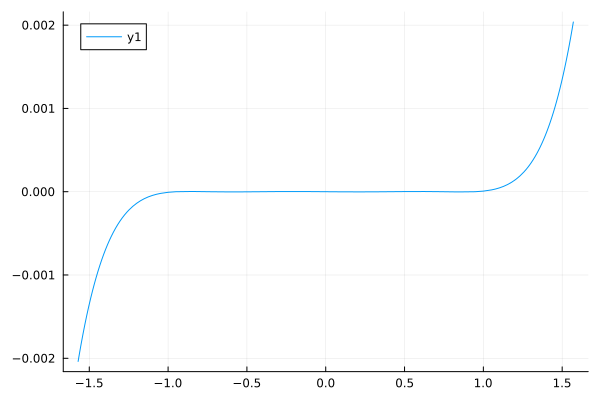

In [129]:
plot(x -> p_5(x) - f(x), -pi/2, pi/2)

Repeat using other orthogonal polynomials: Chebyshev, Laguerre, Hermite, etc. 

See: https://jverzani.github.io/SpecialPolynomials.jl/stable/#Orthogonal-polynomials


## Chebyshev polynomials



In [130]:
basis_ch = basis.(ChebyshevT, 0:5)

6-element Vector{ChebyshevT{Float64, :x}}:
 ChebyshevT(1.0⋅T_0(x))
 ChebyshevT(1.0⋅T_1(x))
 ChebyshevT(1.0⋅T_2(x))
 ChebyshevT(1.0⋅T_3(x))
 ChebyshevT(1.0⋅T_4(x))
 ChebyshevT(1.0⋅T_5(x))

In [131]:
convert.(Polynomial, basis_ch)

6-element Vector{Polynomial{Float64, :x}}:
 Polynomial(1.0)
 Polynomial(1.0*x)
 Polynomial(-1.0 + 2.0*x^2)
 Polynomial(-3.0*x + 4.0*x^3)
 Polynomial(1.0 - 8.0*x^2 + 8.0*x^4)
 Polynomial(5.0*x - 20.0*x^3 + 16.0*x^5)

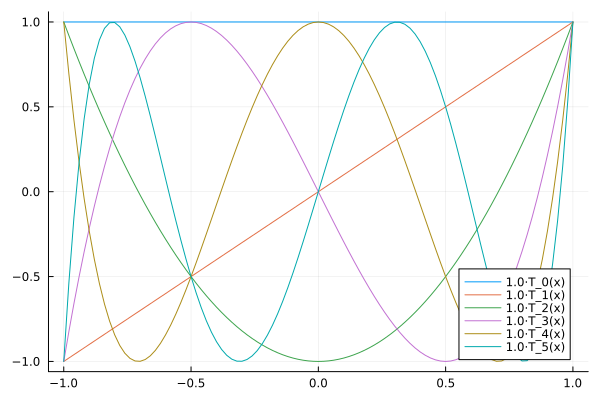

In [132]:
a = plot(basis_ch[1], -1, 1)
for f in basis_ch[2:end]
    plot!(f, -1, 1)
end
a

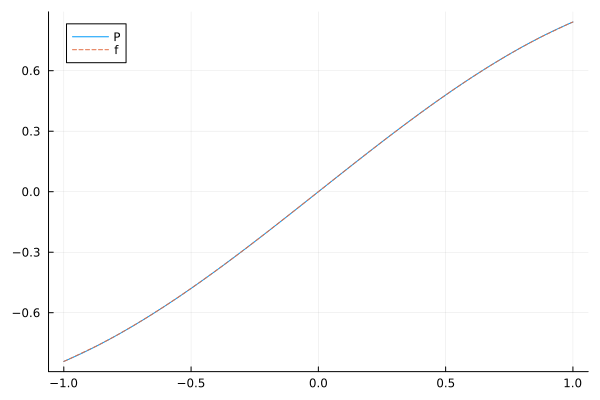

In [133]:
f = sin
p_5 = poly_approx(f, basis_ch, Chebyshev)
plot(p_5, -1, 1, label = "P")
plot!(f, -1, 1, label = "f", line = :dash)

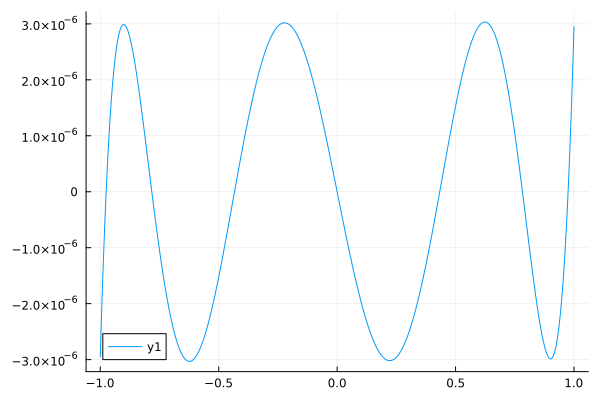

In [135]:
plot(x -> p_5(x) .- f(x), -1, 1)

In [76]:
p_5

ChebyshevT(- 3.7720888432333387e-16⋅T_0(x) + 0.880101172583401⋅T_1(x) - 7.981916494851853e-16⋅T_2(x) - 0.039126731267127374⋅T_3(x) - 8.553867040886144e-16⋅T_4(x) + 0.0004994932102694551⋅T_5(x))

## Hermite

Hermite polynomials are defined on the real line $(-\infty, \infty)$ and are orthogonal with the weight function $w(x) = \exp(-x^2/2)$.

The library innerproduct function takes care of this for us.

In [80]:
basis_ch = basis.(Hermite, 0:5)
convert.(Polynomial, basis_ch)

6-element Vector{Polynomial{Float64, :x}}:
 Polynomial(1.0)
 Polynomial(2.0*x)
 Polynomial(-2.0 + 4.0*x^2)
 Polynomial(-12.0*x + 8.0*x^3)
 Polynomial(12.0 - 48.0*x^2 + 16.0*x^4)
 Polynomial(120.0*x - 160.0*x^3 + 32.0*x^5)

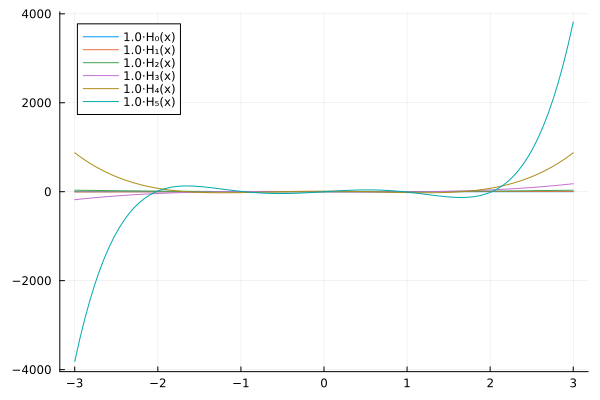

In [84]:
a = plot(basis_ch[1], -3, 3)
for f in basis_ch[2:end]
    plot!(f, -3, 3)
end
a

In [91]:
f = sin
basis_ch = basis.(Hermite, 0:5)
p_5 = poly_approx(f, basis_ch, Hermite)
basis_ch = basis.(Hermite, 0:15)
p_15 = poly_approx(f, basis_ch, Hermite)


Hermite(- 4.4503716578805555e-53⋅H₀(x) + 0.3894003915357284⋅H₁(x) - 2.98077710754313e-18⋅H₂(x) - 0.016225016313987598⋅H₃(x) + 5.588957076643368e-19⋅H₄(x) + 0.0002028127039248441⋅H₅(x) - 1.0349920512302534e-19⋅H₆(x) - 1.2072184757431055e-6⋅H₇(x) + 4.7313922341954445e-21⋅H₈(x) + 4.1917308185513515e-9⋅H₉(x) - 5.257102482439316e-22⋅H₁₀(x) - 9.526660951286479e-12⋅H₁₁(x) + 9.558368149889764e-24⋅H₁₂(x) + 1.5267084853228048e-14⋅H₁₃(x) - 5.601974007261356e-25⋅H₁₄(x) - 1.8175100987787545e-17⋅H₁₅(x))

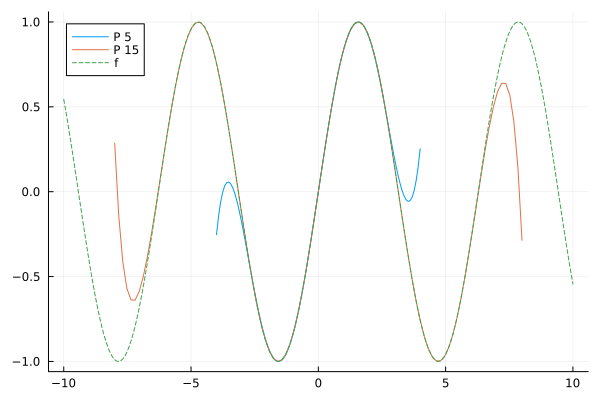

In [97]:
plot(p_5, -4, 4, label = "P 5")
plot!(p_15, -8, 8, label = "P 15")
plot!(f, -10, 10, label = "f", line = :dash)

## Roots of polynomials

In [109]:
basis.(Legendre, 5)

Legendre(1.0⋅P₅(x))

In [110]:
roots(basis.(Legendre, 5))

5-element Vector{ComplexF64}:
  -0.906179845938664 + 0.0im
 -0.5384693101056831 + 0.0im
                 0.0 + 0.0im
  0.5384693101056831 + 0.0im
   0.906179845938664 + 0.0im

In [111]:
roots(basis.(Hermite, 5))

5-element Vector{ComplexF64}:
    -2.0201828704560856 + 0.0im
    -0.9585724646138185 + 0.0im
 -8.077935669463161e-28 + 0.0im
     0.9585724646138185 + 0.0im
     2.0201828704560856 + 0.0im

In [113]:
roots(basis.(Chebyshev, 5))

5-element Vector{ComplexF64}:
 -0.9510565162951536 + 0.0im
 -0.5877852522924731 + 0.0im
                 0.0 + 0.0im
  0.5877852522924731 + 0.0im
  0.9510565162951535 + 0.0im

### Defining orthogonal polynomials

Here we define the Legendre polynomials with our own function, not using library functions, starting with $P_0 = 1$. To get the next polynomial, increase the degree by 1, ensure the leading coefficient is 1 and that the integrals (inner products) with lower degree polynomials are 0.

Given a maximum degree of the polynomials $n$, I make an $n+1$ by $n+1$ matrix, and store the coefficients of $P_n$ in row $n+1$.

Create the polynomials $1\cdot x^n$ and the subtract the integrals of each of the lower degree polynomials with that starting polynomial.

These coefficients are different (by a multiplicative factor) from the ones defined in the library we used above, but the roots of the polynomials are the same.

In [115]:
using Polynomials
LegendreCoefficients = function(n)
   P = zeros(n+1, n+1)
   for i = 1:(n+1)
        P[i,i] = 1
        p = Polynomial(vec(P[i,1:i]))
        pDelta = Polynomial(0)
        for j = (i-1):-1:1
            p0 = Polynomial(vec(P[j,: ]))
            pDelta = pDelta + p0 * integrate(p0 * p, -1, 1) / integrate(p0*p0, -1, 1)
        end
        P[i,1:i] = coeffs(p - pDelta)
    end
    P
end

#21 (generic function with 1 method)

In [15]:
LegendreCoefficients(6)

7×7 Matrix{Float64}:
  1.0         0.0        0.0        0.0       0.0      0.0  0.0
  0.0         1.0        0.0        0.0       0.0      0.0  0.0
 -0.333333    0.0        1.0        0.0       0.0      0.0  0.0
  0.0        -0.6        0.0        1.0       0.0      0.0  0.0
  0.0857143   0.0       -0.857143   0.0       1.0      0.0  0.0
  0.0         0.238095   0.0       -1.11111   0.0      1.0  0.0
 -0.021645    0.0        0.454545   0.0      -1.36364  0.0  1.0

Compute the roots and store them in a table. We'll need them later.

In [17]:
LegendreRoots = function(n)
    R = zeros(n, n)  # Drop constant polynomial P0 = 1
    P = LegendreCoefficients(n)
    for i in 1:n
        R[i, 1:i] = sort(roots(Polynomial(P[i+1, :])))
    end
    R
end
LegendreRoots(6)

6×6 Matrix{Float64}:
 -0.0        0.0        0.0       0.0       0.0       0.0
 -0.57735    0.57735    0.0       0.0       0.0       0.0
 -0.774597   0.0        0.774597  0.0       0.0       0.0
 -0.861136  -0.339981   0.339981  0.861136  0.0       0.0
 -0.90618   -0.538469   0.0       0.538469  0.90618   0.0
 -0.93247   -0.661209  -0.238619  0.238619  0.661209  0.93247

In [25]:
roots(pk[6]) # Compare with roots of polynomials from SpecialPolynomials

5-element Vector{ComplexF64}:
     -0.906179845938664 + 0.0im
    -0.5384693101056831 + 0.0im
 3.0814879110195774e-33 + 0.0im
     0.5384693101056831 + 0.0im
      0.906179845938664 + 0.0im